<a href="https://colab.research.google.com/github/abdullah-Khan-prog/Sentiment-Analysis-using-NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import nltk
import pandas as pd
import numpy as np
import tensorflow as tf
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

In [45]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [46]:
data = pd.read_csv('Movie_Reviews.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df =data.dropna()

In [8]:
data.shape

(50000, 2)

In [9]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [47]:
st = PorterStemmer()
print("Stemming")
print("Playing ->", st.stem("Playing"))
print("Played ->", st.stem("Played"))
print("flies ->", st.stem("flies"))

Stemming
Playing -> play
Played -> play
flies -> fli


In [48]:
lm = WordNetLemmatizer()
print("Lemmatization")
print("Playing ->", lm.lemmatize("Playing"))
print("Played ->", lm.lemmatize("Played"))
print("flies ->", lm.lemmatize("flies"))

Lemmatization
Playing -> Playing
Played -> Played
flies -> fly


In [49]:
punctuation = string.punctuation
stopwords = nltk.corpus.stopwords.words('english')
lm = WordNetLemmatizer()

In [50]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = "".join([char.lower() for char in text if char not in punctuation])
    tokens = word_tokenize(text)
    text = " ".join([lm.lemmatize(char) for char in tokens if char not in stopwords])
    return text

In [51]:
X = df['review'].apply(lambda x: clean_text(x))

In [52]:
Y = df = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [53]:
Y

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [54]:
sum=0
for i in X.to_list():
    sum+=len(i.split(" "))
avg = sum/len(X.to_list())
avg


119.84288

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,TextVectorization, Dropout

In [57]:
vocab_size = 20000
max_len = 200
vectorize_layer = TextVectorization(
 max_tokens=vocab_size,
 output_mode='int',
 output_sequence_length=max_len)

In [58]:
vectorize_layer.adapt(X_train)

In [59]:
vocab = np.array(vectorize_layer.get_vocabulary())
vocab[:50]

array(['', '[UNK]', 'movie', 'film', 'one', 'like', 'time', 'good',
       'character', 'get', 'story', 'even', 'would', 'see', 'make',
       'really', 'scene', 'much', 'well', 'people', 'great', 'also',
       'bad', 'show', 'first', 'dont', 'way', 'thing', 'made', 'could',
       'think', 'life', 'go', 'know', 'watch', 'love', 'many', 'seen',
       'actor', 'two', 'never', 'say', 'plot', 'look', 'acting', 'little',
       'end', 'best', 'year', 'ever'], dtype='<U18')

In [60]:
x1 = vectorize_layer(X_train)

In [62]:
X_train.shape

(37500,)

In [61]:
x1

<tf.Tensor: shape=(37500, 200), dtype=int64, numpy=
array([[ 5422,   961,  1478, ...,     0,     0,     0],
       [ 3277,  2967,   432, ...,     0,     0,     0],
       [  113,   638, 12930, ...,     0,     0,     0],
       ...,
       [  524,   110,    15, ...,     0,     0,     0],
       [   61,  1279,   302, ...,  3355,    51,    90],
       [ 1170,  3235,  2377, ...,     0,     0,     0]])>

In [63]:
vocab

array(['', '[UNK]', 'movie', ..., 'matron', 'markoff', 'marions'],
      dtype='<U18')

In [64]:
foleys = np.where(vocab == 'noir')
foleys

(array([1607]),)

In [65]:
X_train.to_list()[2]

'ive tried reconcile many bad review film vast majority review given rating 7 10 reason may film kind hard describe positive review although done quite nicely already film confusing depressing doesnt happy ending still gave pola x rating 10 basically literature art combined film really favorite kind filmmaking ive seen two caraxs film one mauvis sang film im somewhat pretentious call one caraxs best film carax minimalist style type film appeal boring would best watch pola x less minimalist mauvis sang quite lot intensity thriller least taste found quite interesting absorbing two lead role excellent job acting mean lead young woman thought half sister catherine always great role large significant story everyone fine job thought cult stuff great may believable due rather abstract lot going line film freudian psychothriller'

In [66]:
x1[2,:]

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([  113,   638, 12930,    36,    22,   302,     3,  3518,  2031,
         302,   251,   520,  1126,   201,   144,   108,     3,   136,
         177,  1502,   946,   302,   182,   133,    91,  1581,   365,
           3,  1290,  2061,    65,   564,   174,    54,   399, 11278,
        2691,   520,   201,   582,  4235,   340,  2394,     3,    15,
         345,   136,  1360,   113,    37,    39,     1,     3,     4,
           1,  6335,     3,    68,   526,  1828,   397,     4,     1,
          47,     3, 13447,  8484,   311,   380,     3,  1051,   257,
          12,    47,    34, 11278,  2691,   253,  8484,     1,  6335,
          91,    61,  2764,   546,   129,   953,   156,    91,   128,
        6199,    39,   213,    77,   222,   179,    44,   185,   213,
         102,    72,    97,   252,   485,  2750,   119,    20,    77,
         859,  2493,    10,   204,   387,   179,    97,  1100,   419,
          20,   108,   709,   555,   151,  6

In [76]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_shape=(max_len,)))
model.add(LSTM(100))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 100)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,086,929 (7.96 MB)

 Trainable params: 2,086,929 (7.96 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

X_train_vectorized = vectorize_layer(X_train)
X_test_vectorized = vectorize_layer(X_test)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_vectorized, Y_train , validation_data=(X_test_vectorized, Y_test), batch_size=32, epochs=10,
                    callbacks = [early_stop])

Epoch 1/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 151s 127ms/step - accuracy: 0.5168 - loss: 0.6959 - val_accuracy: 0.5269 - val_loss: 0.6918
Epoch 2/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 200s 125ms/step - accuracy: 0.5411 - loss: 0.6771 - val_accuracy: 0.5001 - val_loss: 0.6929
Epoch 3/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 190s 115ms/step - accuracy: 0.5659 - loss: 0.6561 - val_accuracy: 0.8237 - val_loss: 0.4195
Epoch 4/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 151s 123ms/step - accuracy: 0.8753 - loss: 0.3304 - val_accuracy: 0.8765 - val_loss: 0.3005
Epoch 5/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 146s 124ms/step - accuracy: 0.9300 - loss: 0.2047 - val_accuracy: 0.8824 - val_loss: 0.2985
Epoch 6/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 204s 126ms/step - accuracy: 0.9600 - loss: 0.1343 - val_accuracy: 0.8728 - val_loss: 0.3346
Epoch 7/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 189s 115ms/step - accuracy: 0.9771 - loss: 0.0846 - val_accuracy: 0.8740 - val_loss: 0.4312


In [86]:
model.save("./Sentiment_Classifier_v1.keras")

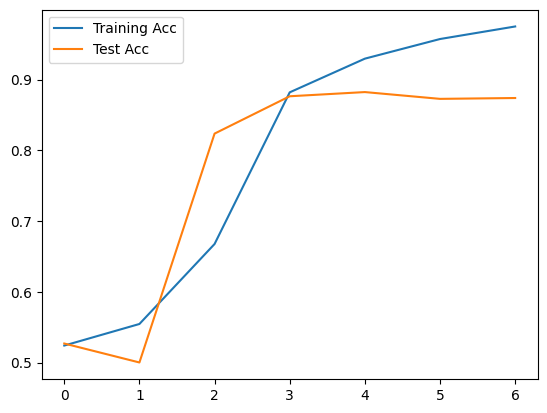

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Test Acc')
plt.legend()
plt.show()

In [89]:
Test_text = 'The movie was good. The animation and the graphics were out of this world. I would recommend this movie.'
Test_text_vectorized = vectorize_layer([Test_text])
prediction = model.predict(Test_text_vectorized)
if(prediction[0]>0.5):
    print("Positive Sentiment", "\nScore:",prediction[0][0])
else:
    print("Negative Sentiment","\nScore:",prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Positive Sentiment 
Score: 0.78651357


In [91]:
Test_text = 'The movie was good in first-half, but second half is worst, so i hate it'
Test_text_vectorized = vectorize_layer([Test_text])
prediction = model.predict(Test_text_vectorized)
if(prediction[0]>0.5):
    print("Positive Sentiment", "\nScore:",prediction[0][0])
else:
    print("Negative Sentiment","\nScore:",prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Negative Sentiment 
Score: 0.036330428


In [92]:
type(X_test)

pandas.core.series.Series

In [94]:
X_test_vectorized = vectorize_layer(X_test)
y_pred = model.predict(X_test_vectorized)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
y_pred_binary

391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [95]:
y_pred_binary.shape

(12500, 1)

In [96]:
y_true = np.array([Y_test.to_list()]).T
y_true.shape

(12500, 1)

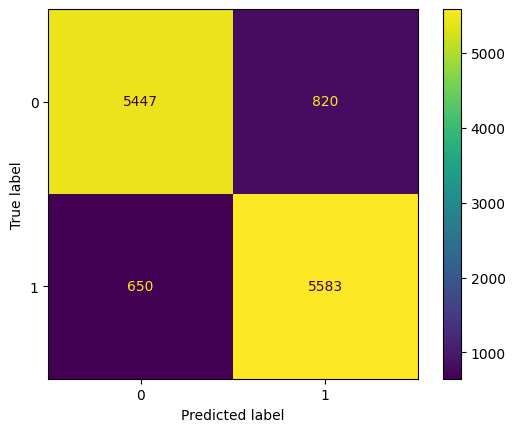

In [97]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred_binary))
disp.plot()

In [98]:
print(classification_report(y_true, y_pred_binary))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6267
           1       0.87      0.90      0.88      6233

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500

